In [21]:
import pandas as pd
import seaborn as sns
from prophet import Prophet
import matplotlib.pyplot as plt

In [22]:
raw_data = pd.read_csv('NARA.csv', index_col=0)

In [23]:
raw_data['price'] = raw_data['price'].astype('int64')

In [24]:
raw_data.drop(index = raw_data[raw_data.price > 2000000].index, inplace=True)
raw_data.drop(index = raw_data[raw_data.price < 50000].index, inplace=True)

해당 자료에서도 광고성 글들이 비정상적인 가격을 기재하고 있어서 일단 전반적인 전처리는 동일하게 유지 해놓고 진행 했습니다.

In [27]:
onsale_data = raw_data[raw_data['is_Sale'] == '판매']
onsale_data['price'] = onsale_data['price'].astype('int64')
onsale_data

C:\Users\k5000\AppData\Local\Temp\ipykernel_24624\273176522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onsale_data['price'] = onsale_data['price'].astype('int64')


,postingDate,is_Sale,title,url,price
0,2022-11-01 00:00:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,470000
1,2022-11-01 00:03:00,판매,아이폰8,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,150000
2,2022-11-01 00:04:00,판매,아이폰13,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,1050000
3,2022-11-01 00:05:00,판매,아이폰6,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,160000
4,2022-11-01 00:06:00,판매,아이폰12,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,760000
...,...,...,...,...,...
11251,2022-11-10 14:58:00,판매,아이폰13,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,900000
11252,2022-11-10 15:00:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,250000
11253,2022-11-10 15:01:00,판매,아이폰12,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,300000
11254,2022-11-10 15:02:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,400000


판매 완료된 데이터의 수가 적어 먼저 판매중인 자료로 학습을 진행하고, 

학습의 정답 레이블을 판매 완료 가격으로 지정하여 예측 및 시장가격 조사를 할 계획입니다. 

아이폰11
count      1733.000000
mean     446261.396422
std      106206.932821
min      150000.000000
25%      370000.000000
50%      430000.000000
75%      520000.000000
max      750000.000000
Name: price, dtype: float64


C:\Users\k5000\AppData\Local\Temp\ipykernel_24624\1010468363.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finding['title'] = search_name


<AxesSubplot:xlabel='title', ylabel='price'>

<Figure size 1080x360 with 0 Axes>

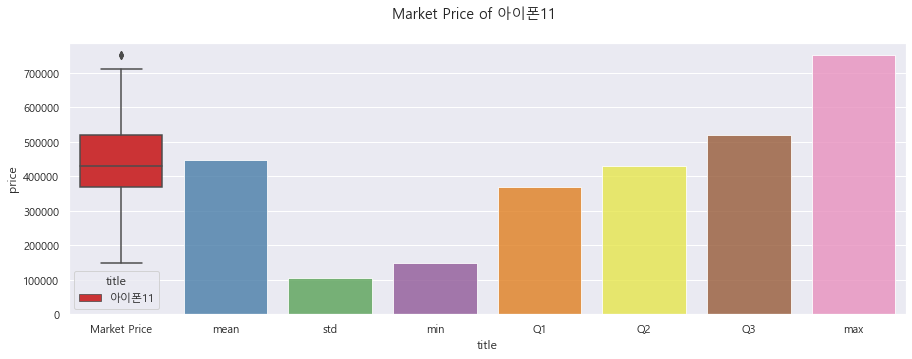

In [29]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

search_name = input()

plt.rcParams['font.family'] = 'Malgun Gothic'
finding = onsale_data[onsale_data['title'].str.contains(search_name, regex=False, case=False)]
finding['title'] = search_name
plt.figure(figsize=(15,5))

INFO = finding['price'].describe()
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Market Price of ' + search_name)
plot_index = ['Market Price', 'mean', 'std', 'min', 'Q1', 'Q2', 'Q3', 'max']
print(INFO)

sns.boxplot(x=finding['title'],y=finding['price'],palette="Set1", hue=finding['title'])
sns.barplot(x=plot_index, y=INFO.values, alpha=0.8, palette='Set1', orient='v')

In [30]:
finding['floor'] = 0 #최저가격 0으로 제한, 왜 안되지

m = Prophet() 

finding['ds'] = finding['postingDate']
finding['y'] = finding['price']
finding.drop(labels=['postingDate','price'],axis=1,inplace=True)

C:\Users\k5000\AppData\Local\Temp\ipykernel_24624\2664934193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finding['floor'] = 0 #최저가격 0으로 제한
C:\Users\k5000\AppData\Local\Temp\ipykernel_24624\2664934193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finding['ds'] = finding['postingDate']
C:\Users\k5000\AppData\Local\Temp\ipykernel_24624\2664934193.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Prophet 라이브러리의 시계열 예측을 시작하기에 앞서, 예측에 필요한 컬럼인 ds와 y를 구분하는 단계입니다.

In [31]:
m.fit(finding)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
C:\Users\k5000\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [32]:
future = m.make_future_dataframe(periods=60)
future['floor'] = 0

forecast = m.predict(future)

C:\Users\k5000\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\k5000\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\k5000\miniconda3\lib\site-packages\prophet\plot.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\k5000\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


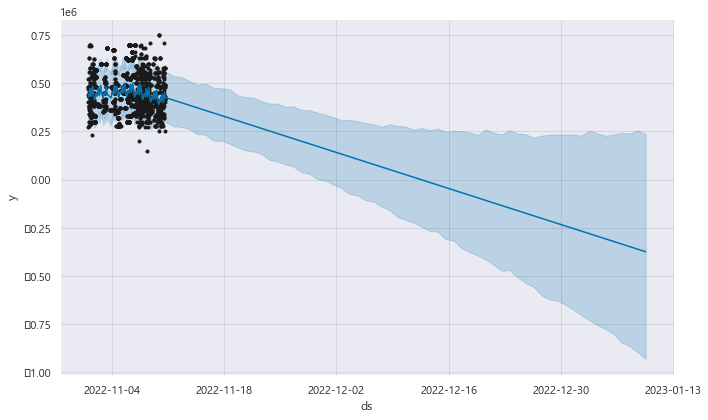

C:\Users\k5000\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


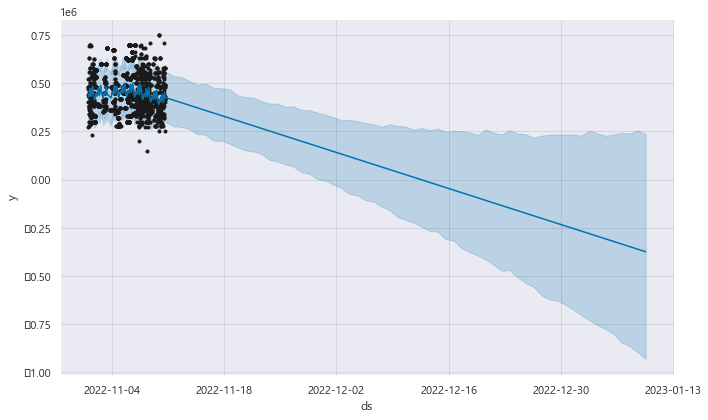

In [33]:
m.plot(forecast)

Prophet model을 fitting하고, 미래시간에 대한 dataframe을 만들어 predict를 완료한 단계입니다. 예측을 수행하기에 충분한 데이터를 보유하고 있지 않아 현재는 선형적인 그래프의 모습을 띄고 있으나, 데이터가 많을 경우 정상적으로 작동될 것으로 기대됩니다.